<a href="https://colab.research.google.com/github/wetherc/data-2000/blob/main/2023_12_07_semester_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import tempfile
import os
# Preset Matplotlib figure sizes.
matplotlib.rcParams['figure.figsize'] = [9, 6]

In [20]:
import pandas as pd

X_train, y_train = tfds.load(
    "mnist",
    split=['train[0:10000]'],
    batch_size=-1, as_supervised=True)[0]

X_test, y_test = tfds.load(
    "mnist",
    split=['test[0:2500]'],
    batch_size=-1, as_supervised=True)[0]

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [21]:
y_train

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,1,0,0
9996,0,0,0,1,0,0,0,0,0,0
9997,0,1,0,0,0,0,0,0,0,0
9998,0,0,1,0,0,0,0,0,0,0


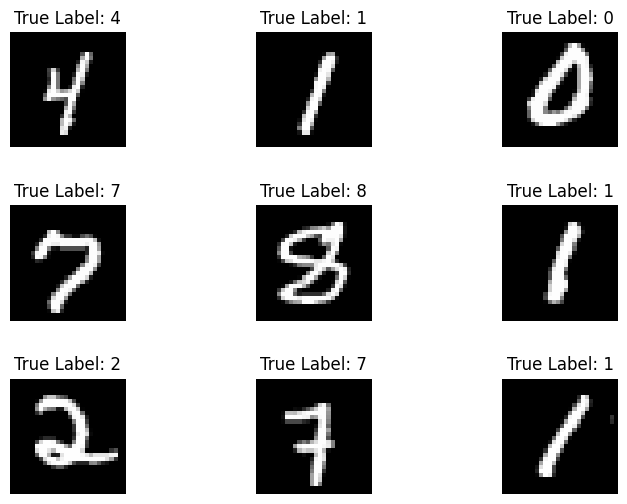

In [4]:
x_viz, y_viz = tfds.load("mnist", split=['train[:1500]'], batch_size=-1, as_supervised=True)[0]
x_viz = tf.squeeze(x_viz, axis=3)

for i in range(9):
    plt.subplot(3,3,1+i)
    plt.axis('off')
    plt.imshow(x_viz[i], cmap='gray')
    plt.title(f"True Label: {y_viz[i]}")
    plt.subplots_adjust(hspace=.5)

In [5]:
def preprocess(x, y):
  # Reshaping the data
  x = tf.reshape(x, shape=[-1, 784])
  # Rescaling the data
  x = x/255
  return x, y

train_data, val_data = train_data.map(preprocess), val_data.map(preprocess)

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, losses

input = tf.keras.layers.Input(shape=(28, 28, 1))
conv1 = tf.keras.layers.Conv2D(7, 2, activation='relu')(input)
pooling1 = tf.keras.layers.AveragePooling2D(2)(conv1)
dropout1 = tf.keras.layers.SpatialDropout2D(.4)(pooling1)
conv2 = tf.keras.layers.Conv2D(4, 2, activation='relu')(dropout1)
pooling2 = tf.keras.layers.AveragePooling2D(2)(conv2)
dropout2 = tf.keras.layers.SpatialDropout2D(.4)(pooling2)
flatten = tf.keras.layers.Flatten()(dropout2)

dense = tf.keras.layers.Dense(100, activation = 'relu')(flatten)

output = tf.keras.layers.Dense(10, activation = 'softmax')(dense)

In [12]:
model = tf.keras.Model(input, output)

In [13]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.RMSprop(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 7)         35        
                                                                 
 average_pooling2d_4 (Avera  (None, 13, 13, 7)         0         
 gePooling2D)                                                    
                                                                 
 spatial_dropout2d_4 (Spati  (None, 13, 13, 7)         0         
 alDropout2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 4)         116       
                                                                 
 average_pooling2d_5 (Avera  (None, 6, 6, 4)           0     

In [22]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
313/313 [==============================] - 7s 13ms/step - loss: 2.9030 - categorical_accuracy: 0.4987 - val_loss: 0.5079 - val_categorical_accuracy: 0.8584
Epoch 2/10
313/313 [==============================] - 4s 13ms/step - loss: 0.8247 - categorical_accuracy: 0.7464 - val_loss: 0.3429 - val_categorical_accuracy: 0.9012
Epoch 3/10
313/313 [==============================] - 5s 17ms/step - loss: 0.6511 - categorical_accuracy: 0.7981 - val_loss: 0.2579 - val_categorical_accuracy: 0.9244
Epoch 4/10
313/313 [==============================] - 5s 15ms/step - loss: 0.5612 - categorical_accuracy: 0.8337 - val_loss: 0.2150 - val_categorical_accuracy: 0.9392
Epoch 5/10
313/313 [==============================] - 4s 14ms/step - loss: 0.4856 - categorical_accuracy: 0.8496 - val_loss: 0.2083 - val_categorical_accuracy: 0.9364
Epoch 6/10
313/313 [==============================] - 6s 19ms/step - loss: 0.4471 - categorical_accuracy: 0.8602 - val_loss: 0.1774 - val_categorical_accuracy: 0.946

In [23]:
_eval_data_x = X_test[0:10]
_eval_data_y = y_test[0:10]

In [32]:
from sklearn.metrics import confusion_matrix
import numpy as np

_preds = [np.argmax(_pred) for _pred in model.predict(_eval_data_x)]

1/1 [==============================] - 0s 53ms/step


In [35]:
print([elem for elem in zip(_preds, _eval_data_y)])

[(2, 0), (0, 1), (4, 2), (8, 3), (7, 4), (6, 5), (0, 6), (6, 7), (3, 8), (1, 9)]
